In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from ncon import ncon
import scipy.linalg as sla 

def TFI_itebd(J:float,h:float,δ:float,d:int,D:int,nᵢ:int) -> float:
    # Hamiltonian definition
    X = np.array([[0,1],[1,0]])
    Z = np.array([[1,0],[0,-1]])
    Id = np.array([[1,0],[0,1]])
    Hzz = ncon([Z,Z],[[-1,-3],[-2,-4]])
    Hx = 0.5*(ncon([Id,X],[[-1,-3],[-2,-4]]) + ncon([X,Id],[[-1,-3],[-2,-4]]))
    H = J*Hzz - h*Hx
    Hexp = np.reshape(H,[d*d,d*d])
    Ug = sla.expm(-δ*Hexp)
    Ug = np.reshape(Ug,[d,d,d,d])
    M = 0.5*(ncon([Z,Z],[[-1,-3],[-2,-4]]))
    # creation of tensors
    ΓA = np.random.rand(D,D,d)
    ΓA = ΓA/np.linalg.norm(ΓA)
    ΓB = np.random.rand(D,D,d)
    ΓB = ΓB/np.linalg.norm(ΓB)
    Γ = [ΓA,ΓB]
    λA = np.random.rand(D)
    λA = λA/np.linalg.norm(λA)
    λB = np.random.rand(D)
    λB = λB/np.linalg.norm(λB)
    λ = [λA, λB]
    
    for stp in range(nᵢ):
        A = np.mod(stp,2)
        B = np.mod(stp+1,2)
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B]), Ug]
        connect = [[-1,1],[1,2,3],[2,4],[4,5,6],[5,-3],[3,6,-2,-4]]
        order = [1,4,5,2,3,6]
        θ = ncon(tensors,connect,order)
        θ = np.reshape(θ,[d*D,d*D])
        U,S,Vd = np.linalg.svd(θ)
        Γ[A] = U[:,0:D]
        Γ[A] = np.reshape(Γ[A],[D,d,D])
        Γ[A] = np.transpose(Γ[A],[0,2,1])
        Γ[B] = Vd[0:D,:]
        Γ[B] = np.reshape(Γ[B], [D,D,d])
        λ[A] = S[0:D]/np.linalg.norm(S[0:D])
        Γ[A] = ncon([np.diag(1./λ[B]),Γ[A]],[[-1,1],[1,-2,-3]])
        Γ[B] = ncon([Γ[B], np.diag(1./λ[B])],[[-1,1,-3],[1,-2]])
    E = []
    for j in range(len(Γ)):
        A = np.mod(j,2)
        B = np.mod(j+1,2)
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B])]
        connect = [[-1,1],[1,2,-2],[2,3],[3,4,-4],[4,-3]]
        order = [1,4,3,2]
        θ = ncon(tensors,connect,order)
        Eb = ncon([θ, H, np.conj(θ)],[[1,2,3,4],[2,4,5,6],[1,5,3,6]],[5,6,1,2,3,4])
        E.append(Eb)
    E_total = np.sum(E)
    E0 = E_total/2 
    
    Mag = []
    for j in range(len(Γ)):
        A = np.mod(j,2)
        B = np.mod(j+1,2)
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B])]
        connect = [[-1,1],[1,2,-2],[2,3],[3,4,-4],[4,-3]]
        order = [1,4,3,2]
        θ = ncon(tensors,connect,order)
        Mb = ncon([θ, M, np.conj(θ)],[[1,2,3,4],[2,4,5,6],[1,5,3,6]],[5,6,1,2,3,4])
        Mag.append(Mb)
    M_total = np.sum(Mag)
    Magetization = M_total/2
    return E0, Magetization

In [11]:
# TFI_itebd(J:float,h:float,δ:float,d:int,D:int,nᵢ:int) -> float:

steps = np.linspace(0,4.1,num=20)
E_Ising = []
M_Ising = []
for h in steps:
    E_0, M_0 = TFI_itebd(-1,h,0.1,2,10,1000)
    E_Ising.append(E_0)   
    M_Ising.append(M_0)
    

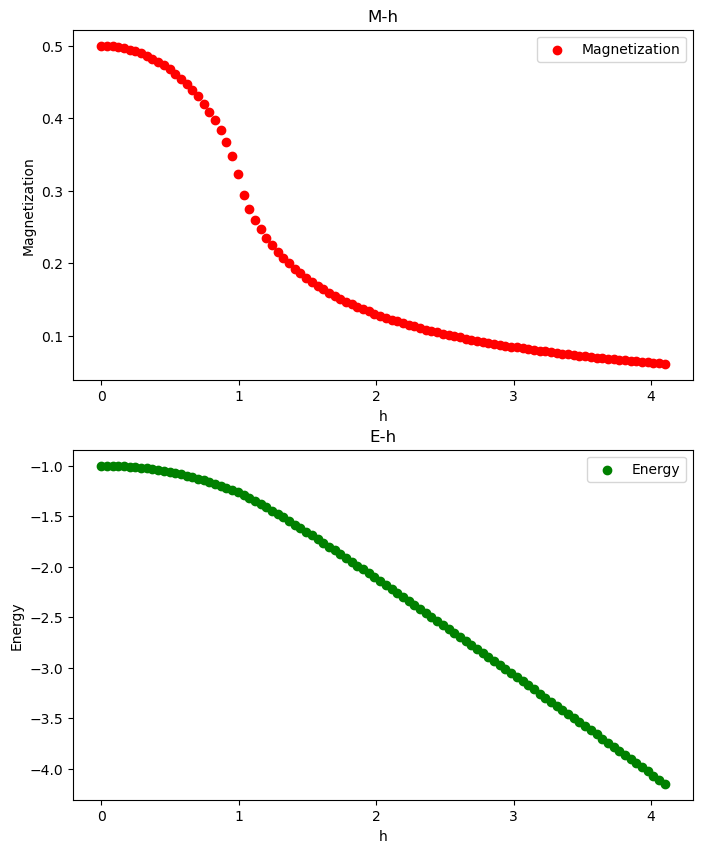

In [12]:
plt.figure(figsize=(8,10)) #dpi=900
plt.subplot(211)
plt.scatter(steps,M_Ising,c='r',label='M')
plt.xlabel("h")
plt.ylabel("Magnetization")
plt.title("M-h")
plt.legend(["Magnetization"],loc="upper right")
plt.subplot(212)
plt.scatter(steps,E_Ising,c='g',label='E')
plt.xlabel("h")
plt.ylabel("Energy")
plt.title("E-h")
plt.legend(["Energy"],loc="upper right")
plt.savefig("Ising_phase")

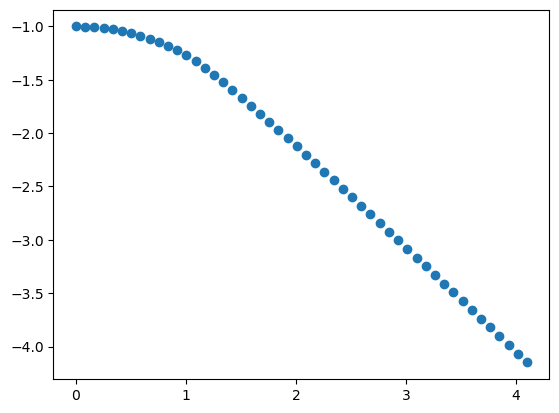

In [11]:
plt.scatter(steps,E_Ising)
# plt.show() 
# plt.savefig("E_Ising")

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from ncon import ncon
import scipy.linalg as sla 

In [2]:
def ITEBD_Ising(h):
    Id = np.array([[1,0],[0,1]])
    X = np.array([[0,1],[1,0]])
    Z = np.array([[1,0],[0,-1]])
    J = -1; 
    δ = 0.1;  
    δ1 = 0.01;
    δ2 = 0.001;
    Nᵢ = 1000; 
    χ = 10; 
    d = 2;
    Hzz = ncon([Z,Z],[[-1,-3],[-2,-4]])
    Hf = 0.5*(ncon([X,Id],[[-1,-3],[-2,-4]]) + ncon([Id,X], [[-1,-3,],[-2,-4]]))
    H = J*Hzz - h*Hf
    H_exp = np.reshape(H,[d*d,d*d])
    Ug = sla.expm(-δ*H_exp)
    Ug = np.reshape(Ug,[d,d,d,d])
    
    Ug1 = sla.expm(-δ1*H_exp)
    Ug1 = np.reshape(Ug,[d,d,d,d])
    
    Ug2 = sla.expm(-δ2*H_exp)
    Ug2 = np.reshape(Ug,[d,d,d,d])

    ΓA = np.random.rand(χ,χ,d);
    ΓA = ΓA/np.max(np.abs(ΓA));
    ΓB = np.random.rand(χ,χ,d);
    ΓB = ΓB/np.max(np.abs(ΓB));
    Γ = [ΓA, ΓB];
    λA = np.random.rand(χ);
    λA = λA/np.trace(np.diag(λA));
    λB = np.random.rand(χ);
    λB = λB/np.trace(np.diag(λB)); ## ?? 
    λ = [λA, λB];
    
    for stp in range(Nᵢ):
        A = np.mod(stp,2)
        B = np.mod(stp+1,2)
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B]), Ug]
        connect = [[-1,1],[1,2,3],[2,4],[4,5,6],[5,-3],[3,6,-2,-4]]
        order = [1,4,5,2,3,6]
        θ = ncon(tensors, connect, order)
        θ = np.reshape(θ,[χ*d,χ*d])
        U,S,Vd = np.linalg.svd(θ)
        Γ[A] = U[:,0:χ]
        λ[A] = S[0:χ]/np.trace(np.diag(S[0:χ])) ## ?
        Γ[B] = Vd[0:χ,:]
        Γ[A] = np.reshape(Γ[A],[χ,d,χ])
        Γ[A] = np.transpose(Γ[A],[0,2,1])
        Γ[B] = np.reshape(Γ[B],[χ,χ,d])
        Γ[A] = ncon([np.diag(1./λ[B]),Γ[A]], [[-1,1],[1,-2,-3]],[1])
        Γ[B] = ncon([Γ[B],np.diag(1./λ[B])], [[-1,1,-3],[1,-2]],[1])
        
    for stp in range(Nᵢ):
        A = np.mod(stp,2)
        B = np.mod(stp+1,2)
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B]), Ug1]
        connect = [[-1,1],[1,2,3],[2,4],[4,5,6],[5,-3],[3,6,-2,-4]]
        order = [1,4,5,2,3,6]
        θ = ncon(tensors, connect, order)
        θ = np.reshape(θ,[χ*d,χ*d])
        U,S,Vd = np.linalg.svd(θ)
        Γ[A] = U[:,0:χ]
        λ[A] = S[0:χ]/np.trace(np.diag(S[0:χ])) ## ?
        Γ[B] = Vd[0:χ,:]
        Γ[A] = np.reshape(Γ[A],[χ,d,χ])
        Γ[A] = np.transpose(Γ[A],[0,2,1])
        Γ[B] = np.reshape(Γ[B],[χ,χ,d])
        Γ[A] = ncon([np.diag(1./λ[B]),Γ[A]], [[-1,1],[1,-2,-3]],[1])
        Γ[B] = ncon([Γ[B],np.diag(1./λ[B])], [[-1,1,-3],[1,-2]],[1])

    for stp in range(Nᵢ):
        A = np.mod(stp,2)
        B = np.mod(stp+1,2)
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B]), Ug2]
        connect = [[-1,1],[1,2,3],[2,4],[4,5,6],[5,-3],[3,6,-2,-4]]
        order = [1,4,5,2,3,6]
        θ = ncon(tensors, connect, order)
        θ = np.reshape(θ,[χ*d,χ*d])
        U,S,Vd = np.linalg.svd(θ)
        Γ[A] = U[:,0:χ]
        λ[A] = S[0:χ]/np.trace(np.diag(S[0:χ])) ## ?
        Γ[B] = Vd[0:χ,:]
        Γ[A] = np.reshape(Γ[A],[χ,d,χ])
        Γ[A] = np.transpose(Γ[A],[0,2,1])
        Γ[B] = np.reshape(Γ[B],[χ,χ,d])
        Γ[A] = ncon([np.diag(1./λ[B]),Γ[A]], [[-1,1],[1,-2,-3]],[1])
        Γ[B] = ncon([Γ[B],np.diag(1./λ[B])], [[-1,1,-3],[1,-2]],[1])
        

        
    E = []
    for j in range(len(Γ)):
        A = np.mod(j,2)
        B = np.mod(j+1,2)
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B])]
        connect = [[-1,1],[1,2,-2],[2,3],[3,4,-4],[4,-3]]
        order = [1,4,3,2]
        θ = ncon(tensors, connect, order)
        Eb = ncon([θ,H,np.conj(θ)],[[1,2,3,4],[2,4,5,6],[1,5,3,6]],[5,6,1,2,3,4]) # ??
        E.append(Eb)
    E_total = np.sum(E)
    E0 = E_total/2.0
    return E0
